## Wind Farm C Layout Based on Wake Effect

In [1]:
import pandas as pd
import numpy as np
import os

# Dataset IDs for Wind Farm C
dataset_ids = [1,4,5,6,8,9,11,12,15,16,18,20,28,29,30,31,32,33,35,36,37,39,
               41,43,44,46,47,48,49,50,54,55,56,57,58,59,60,61,62,63,64,65,
               66,67,70,75,76,78,79,80,81,85,88,89,90,91,93,94]

input_dir = r"D:\Master Thesis New Data Set\CARE DATA SET\CARE_To_Compare\Wind Farm C\Wind Farm C\datasets"

scores = []

for dataset_id in dataset_ids:
    file_path = os.path.join(input_dir, f"{dataset_id}.csv")
    df = pd.read_csv(file_path, delimiter=';')

    # Clean power
    df['power_6_avg'] = df['power_6_avg'].clip(lower=0)

    # Filter for normal operation
    normal = df[
        (df['sensor_76_avg'] <= 2) &
        (df['sensor_76_avg'] >= -5) &
        (df['sensor_124_avg'] >= -10) &
        (df['sensor_124_avg'] <= 10) &
        (df['status_type_id'] == 0) &
        (df['train_test'] == 'train')
    ]

    # Rated power (max observed)
    rated_power = normal['power_6_avg'].max()
    if rated_power == 0 or np.isnan(rated_power):
        continue

    # Mid-range (6–10 m/s)
    subset = normal[(normal['wind_speed_236_avg'] >= 6) & (normal['wind_speed_236_avg'] <= 10)]
    avg_ratio = subset['power_6_avg'].mean() / rated_power
    scores.append((dataset_id, avg_ratio))

# Sort by score
scores.sort(key=lambda x: x[1], reverse=True)

# Top 25% = Strict, Bottom 25% = Lenient
n = len(scores)
strict_cut = int(n * 0.25)
lenient_cut = int(n * 0.75)

for i, (dataset_id, avg_ratio) in enumerate(scores):
    if i < strict_cut:
        pipeline = "Strict"
    elif i >= lenient_cut:
        pipeline = "Lenient"
    else:
        pipeline = "Neutral"
    print(f"Dataset {dataset_id}: avg_ratio={avg_ratio:.3f} → {pipeline}")


Dataset 36: avg_ratio=0.468 → Strict
Dataset 4: avg_ratio=0.468 → Strict
Dataset 12: avg_ratio=0.466 → Strict
Dataset 39: avg_ratio=0.463 → Strict
Dataset 79: avg_ratio=0.463 → Strict
Dataset 46: avg_ratio=0.461 → Strict
Dataset 43: avg_ratio=0.461 → Strict
Dataset 58: avg_ratio=0.460 → Strict
Dataset 28: avg_ratio=0.458 → Strict
Dataset 75: avg_ratio=0.454 → Strict
Dataset 44: avg_ratio=0.454 → Strict
Dataset 78: avg_ratio=0.451 → Strict
Dataset 54: avg_ratio=0.450 → Strict
Dataset 55: avg_ratio=0.448 → Strict
Dataset 93: avg_ratio=0.448 → Neutral
Dataset 61: avg_ratio=0.448 → Neutral
Dataset 63: avg_ratio=0.446 → Neutral
Dataset 9: avg_ratio=0.446 → Neutral
Dataset 90: avg_ratio=0.446 → Neutral
Dataset 88: avg_ratio=0.445 → Neutral
Dataset 33: avg_ratio=0.444 → Neutral
Dataset 8: avg_ratio=0.444 → Neutral
Dataset 91: avg_ratio=0.443 → Neutral
Dataset 70: avg_ratio=0.442 → Neutral
Dataset 32: avg_ratio=0.441 → Neutral
Dataset 11: avg_ratio=0.441 → Neutral
Dataset 60: avg_ratio=0.436 →


Turbine Layout Table:
--------------------------------------------------
WT 2   | Score: 0.467 | Row: Front | Datasets: [12, 36]
WT 52  | Score: 0.458 | Row: Front | Datasets: [28, 39, 43, 54]
WT 44  | Score: 0.454 | Row: Front | Datasets: [44, 75]
WT 50  | Score: 0.446 | Row: Front | Datasets: [8, 55]
WT 56  | Score: 0.446 | Row: Front | Datasets: [63, 90]
WT 43  | Score: 0.445 | Row: Front | Datasets: [11, 33, 61, 93]
WT 42  | Score: 0.442 | Row: Front | Datasets: [32, 91]
WT 15  | Score: 0.436 | Row: Center | Datasets: [64, 78]
WT 16  | Score: 0.433 | Row: Center | Datasets: [30, 46, 65, 79]
WT 55  | Score: 0.432 | Row: Center | Datasets: [9, 57, 88]
WT 34  | Score: 0.428 | Row: Center | Datasets: [4, 18, 56, 94]
WT 23  | Score: 0.418 | Row: Center | Datasets: [37, 70, 80]
WT 35  | Score: 0.413 | Row: Center | Datasets: [31, 48, 58, 67]
WT 14  | Score: 0.411 | Row: Center | Datasets: [85]
WT 33  | Score: 0.409 | Row: Back  | Datasets: [41, 49]
WT 21  | Score: 0.403 | Row: Back  | D

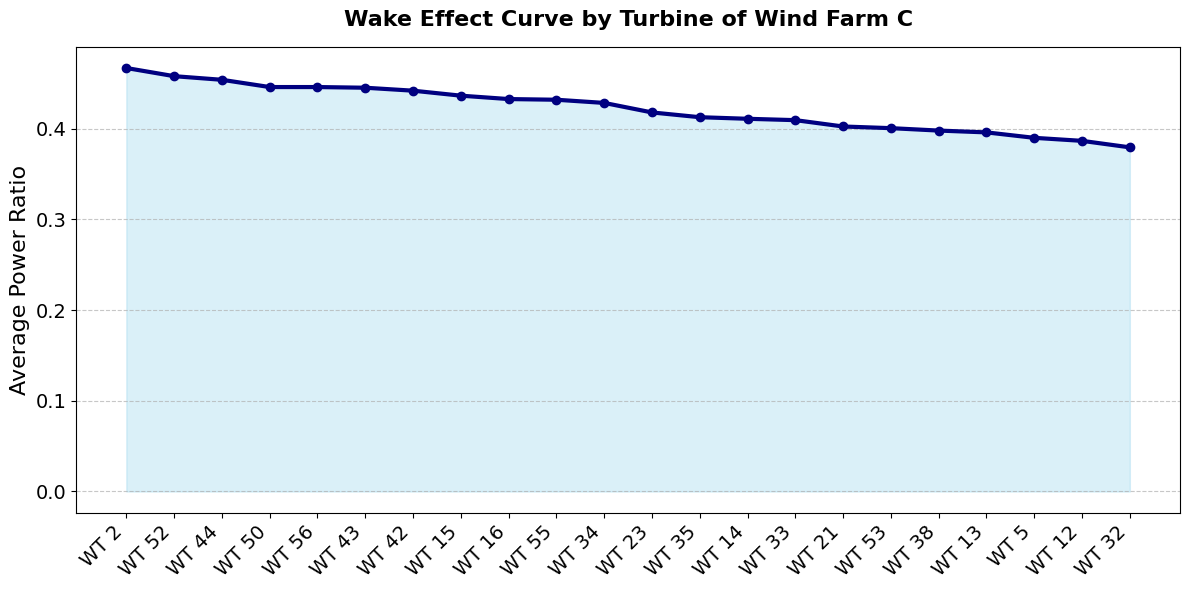

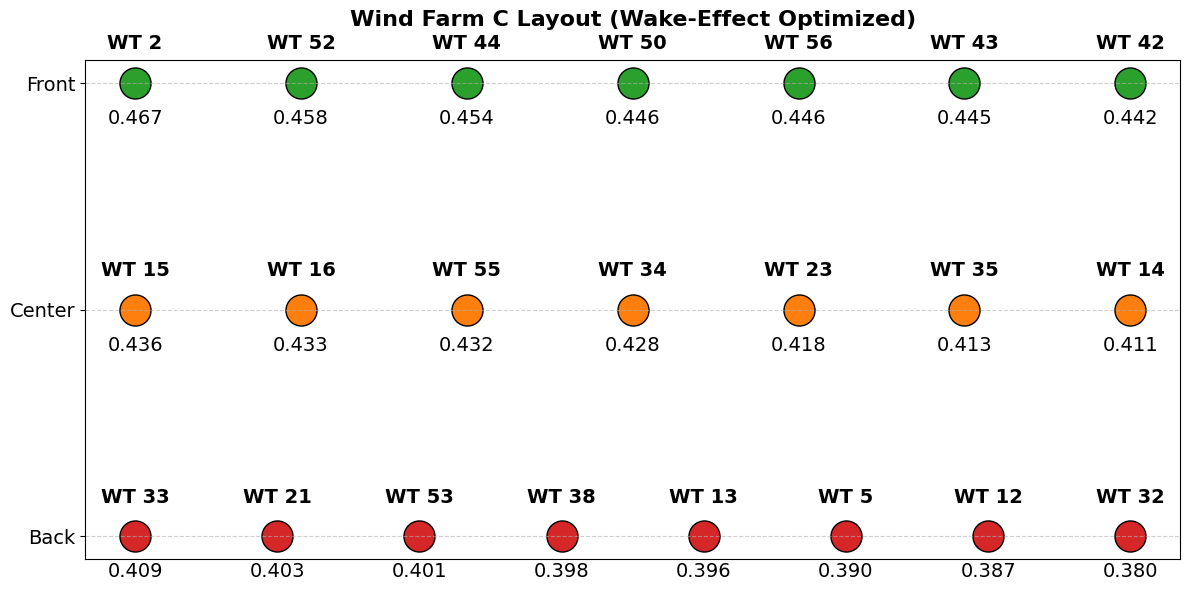

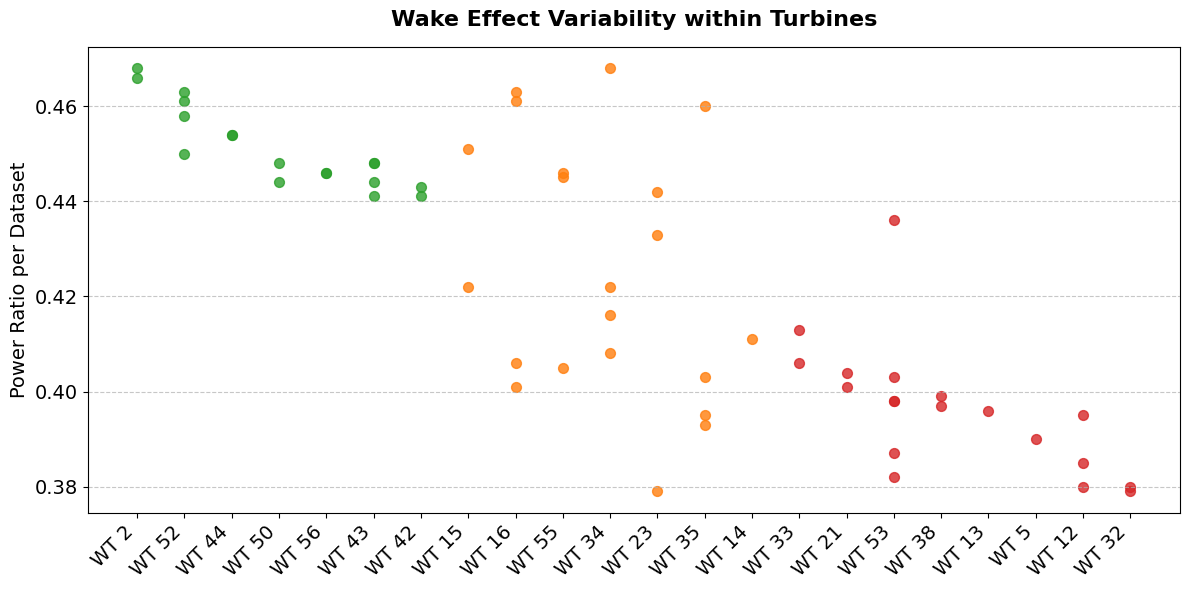

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 1️⃣ Data & Turbine Mapping
# =========================
data_scores = {
    36: 0.468, 4: 0.468, 12: 0.466, 39: 0.463, 79: 0.463, 46: 0.461, 43: 0.461,
    58: 0.460, 28: 0.458, 75: 0.454, 44: 0.454, 78: 0.451, 54: 0.450, 55: 0.448,
    93: 0.448, 61: 0.448, 63: 0.446, 9: 0.446, 90: 0.446, 88: 0.445, 33: 0.444,
    8: 0.444, 91: 0.443, 70: 0.442, 32: 0.441, 11: 0.441, 60: 0.436, 80: 0.433,
    56: 0.422, 64: 0.422, 18: 0.416, 49: 0.413, 85: 0.411, 94: 0.408, 41: 0.406,
    65: 0.406, 57: 0.405, 62: 0.404, 20: 0.403, 31: 0.403, 30: 0.401, 47: 0.401,
    6: 0.399, 1: 0.398, 35: 0.398, 81: 0.397, 29: 0.396, 50: 0.395, 48: 0.395,
    67: 0.393, 89: 0.390, 16: 0.387, 66: 0.385, 76: 0.382, 5: 0.380, 15: 0.380,
    37: 0.379, 59: 0.379
}

wt_map = {
    "WT 53": [1,16,20,35,60,76],
    "WT 34": [4,18,56,94],
    "WT 32": [5,59],
    "WT 38": [6,81],
    "WT 50": [8,55],
    "WT 55": [9,57,88],
    "WT 43": [11,33,61,93],
    "WT 2": [12,36],
    "WT 12": [15,50,66],
    "WT 52": [28,39,43,54],
    "WT 13": [29],
    "WT 16": [30,46,65,79],
    "WT 35": [31,48,58,67],
    "WT 42": [32,91],
    "WT 23": [37,70,80],
    "WT 33": [41,49],
    "WT 44": [44,75],
    "WT 21": [47,62],
    "WT 56": [63,90],
    "WT 15": [64,78],
    "WT 14": [85],
    "WT 5": [89]
}

# =========================
# 2️⃣ Calculate Turbine Scores
# =========================
turbine_scores = {}
turbine_datasets = {}
for wt, datasets in wt_map.items():
    vals = [data_scores[d] for d in datasets if d in data_scores]
    if vals:
        turbine_scores[wt] = np.mean(vals)
        turbine_datasets[wt] = vals

# --- Sort and assign rows ---
sorted_turbines = sorted(turbine_scores.items(), key=lambda x: x[1], reverse=True)
n = len(sorted_turbines)
front_cut = n // 3
center_cut = 2 * n // 3



layout_df = pd.DataFrame(sorted_turbines, columns=["Turbine", "Score"])
layout_df["Row"] = ["Front" if i < front_cut else "Center" if i < center_cut else "Back" for i in range(n)]
colors = {"Front": "#2ca02c", "Center": "#ff7f0e", "Back": "#d62728"}

# =========================
# 4️⃣ Print Table: Turbine, Dataset, Row
# =========================
print("\nTurbine Layout Table:")
print("-" * 50)
for _, row in layout_df.iterrows():
    wt = row["Turbine"]
    score = row["Score"]
    assigned_row = row["Row"]
    datasets = wt_map[wt]
    print(f"{wt:<6} | Score: {score:.3f} | Row: {assigned_row:<5} | Datasets: {datasets}")
print("-" * 50)

# =========================
plt.figure(figsize=(12, 6))
plt.plot(layout_df["Turbine"], layout_df["Score"], marker='o', linewidth=3, color="navy")
plt.fill_between(layout_df["Turbine"], layout_df["Score"], color="skyblue", alpha=0.3)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Average Power Ratio", fontsize=16)

plt.title("Wake Effect Curve by Turbine of Wind Farm C", fontsize=16, weight="bold", pad=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("wind_farm_C_layout.png", dpi=300, bbox_inches="tight")
plt.show()


# =========================
# 3️⃣ Wind Farm Layout Diagram
# =========================
plt.figure(figsize=(12, 6))
row_y = {"Front": 3, "Center": 2, "Back": 1}
for row_name in ["Front", "Center", "Back"]:
    row_turbines = layout_df[layout_df["Row"] == row_name]
    x_positions = np.linspace(0, 10, len(row_turbines))
    for x, (wt, score, row) in zip(x_positions, row_turbines[["Turbine", "Score", "Row"]].values):
        plt.scatter(x, row_y[row], s=500, color=colors[row], edgecolor="black")
        plt.text(x, row_y[row]+0.15, wt, ha="center", fontsize=14, weight="bold")
        plt.text(x, row_y[row]-0.18, f"{score:.3f}", ha="center", fontsize=14)

plt.yticks([1, 2, 3], ["Back", "Center", "Front"], fontsize=14)
plt.xticks([])
plt.title("Wind Farm C Layout (Wake-Effect Optimized)", fontsize=16, weight="bold", pad=25)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("wind_farm_layout_C.png", dpi=300, bbox_inches="tight")  # High-res PN
plt.show()

# =========================
# 4️⃣ Wake Variability Scatter
# =========================
layout_df_sorted = layout_df.sort_values("Score", ascending=False)
plt.figure(figsize=(12, 6))
for i, wt in enumerate(layout_df_sorted["Turbine"]):
    vals = turbine_datasets[wt]
    plt.scatter([i]*len(vals), vals, color=colors[layout_df_sorted.iloc[i]["Row"]], s=50, alpha=0.8)
plt.xticks(range(len(layout_df_sorted)), layout_df_sorted["Turbine"], rotation=45, ha="right",fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Power Ratio per Dataset", fontsize=14)
plt.title("Wake Effect Variability within Turbines", fontsize=16, weight="bold", pad=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("wind_farm_layout_wakeeee_C.png", dpi=300, bbox_inches="tight")  # High-res PN
plt.show()

